# Fake News Detection 
### Designed by Andrew LaPlante Johnson
Data obtained from Kaggle (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv)

## Importing and Viewing the Dataframes


In [1]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import pandas as pd
import re
from sklearn.utils import shuffle
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
v = TfidfVectorizer()

In [2]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
print(true.columns)
print(true.shape)
true.head(3)

Index(['title', 'text', 'subject', 'date'], dtype='object')
(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [4]:
print(fake.columns)
print(fake.shape)
fake.head(3)

Index(['title', 'text', 'subject', 'date'], dtype='object')
(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


As you can see, we are working with a fairly large data set with over 40,000 news articles. This is good, the more data the better in this case.

# Preparing the Data

I needed to create testing datasets from both the True and Fake news datasets. I take the first the 20 articles from each and put them into their own dataframes.

I also give each dataframe an 'Indicator' column so we can differentiate between fake and true news easily.

In [5]:
#Giving numerical values so they are easy to work with
true['Indicator']= 1
fake['Indicator']= 0

test_True = true.head(20)
test_Fake= fake.head(20)

#drop the data from the original
for i in range(20):
    true.drop([i], axis=0, inplace=True)
    fake.drop([i], axis=0, inplace=True)

### Now there are 4 dataframes:

    True: Original true news dataset
    Fake: Original fake news dataset
    test_Fake: First 20 fake news articles  
    test_True: First 20 true news articles

 It is time to merge the datasets together and create one cohesive dataframe.
 
### Merge data and drop irrelevant data

In [6]:
#Creaing a Testing CSV file for ML
test_file = pd.concat([test_Fake,test_True], axis = 0)
test_file.to_csv('test_file.csv')

#Merge the datasets in our actual program to use
merged_df = pd.concat([fake, true], axis = 0)

#Clean up our dataframes! Dont need the title, subject, or date. Also drop index
news_df = merged_df.drop(['title','subject','date'], axis = 1)
news_df.reset_index(inplace = True)
news_df.drop(["index"], axis = 1, inplace = True)

#Get rid of any unwanted characters
def unwanted_char(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text
news_df['text']=news_df['text'].apply(unwanted_char)
#Shuffle our dataframe
news_df = shuffle(news_df)
news_df = news_df.reset_index(drop=True)


### Single Merged Dataframe  

In [7]:
news_df.head(5)

,text,Indicator
0,washington reuters the u s environmental ...,1
1,wellington reuters the leaders of new zeal...,1
2,caracas reuters venezuelan leftist preside...,1
3,bern reuters switzerland and the european ...,1
4,seoul reuters a spokesman for north korea ...,1


### Decide on the X and Y variables 

In [8]:
#X will use the 'text' data as it holds the samples
x = news_df['text']

#y will use 'Indicator' because it holds the labels
y = news_df['Indicator']

### Train Test Split

In [9]:
#train_test_split! Used a test size of 25%
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=.25)

In [10]:
#Here I vectorize the training data and copy it to a new dataframe
vectorize_train = v.fit_transform(Xtrain)
vectorize_test = v.transform(Xtest)


### Pick a model: Logistic Regression
Logistic Regression is a great model to use because it specializes in determining whether something is True or False. All we need to know is if our news is True or Fake, so Logistic Regression should work nicely

In [11]:
#Fit the data to the model
LR = LogisticRegression()
LR.fit(vectorize_train, ytrain)

#Predict
predict = LR.predict(vectorize_test)

#Print the accuracry score
accuracy_score(ytest, predict)



0.9866250557289344

The logistic regression model got a score of 99% accuracy. Logistic Regression proves to be a good model for this.

### Classification Report

In [12]:
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5877
           1       0.98      0.99      0.99      5338

    accuracy                           0.99     11215
   macro avg       0.99      0.99      0.99     11215
weighted avg       0.99      0.99      0.99     11215



## Visualization

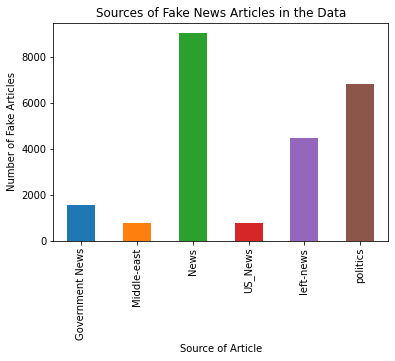

                 text
subject              
Government News  1570
Middle-east       778
News             9030
US_News           783
left-news        4459
politics         6841


In [13]:
fake.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title('Sources of Fake News Articles in the Data')
plt.ylabel('Number of Fake Articles')
plt.xlabel('Source of Article')
plt.show()
print(pd.DataFrame(fake.groupby(['subject'])['text'].count()))

**The sources of fake news seem to be politcally motivated the majority of the time, according to the data being used**

### WordCloud 

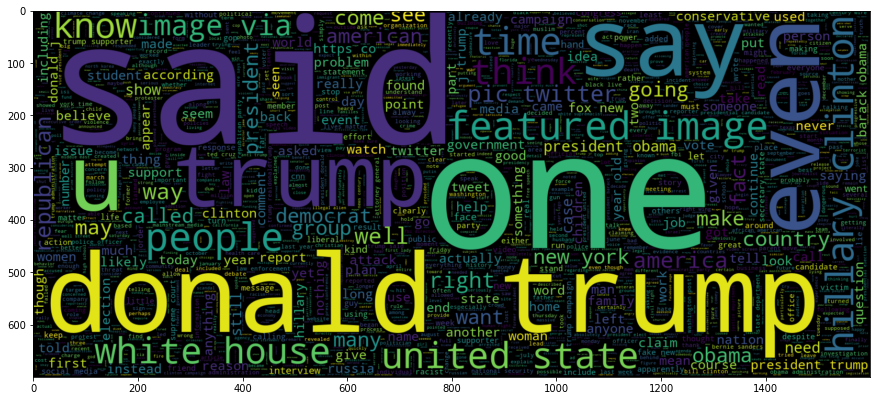

In [14]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
news_df['text'] = news_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(news_df[news_df.Indicator== 0].text))
plt.imshow(wc, interpolation="bilinear")

Text(0.5, 1.0, 'Amount of Fake Articles vs Amount of True Articles')

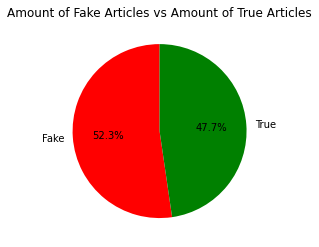

In [15]:
real_label= 44858/23461
fake_label= 44858/21397
plt.pie([fake_label,real_label],colors=['red','green'],startangle=90,labels=['Fake','True'],autopct='%1.1f%%')
plt.title('Amount of Fake Articles vs Amount of True Articles')

# User Input Testing

This program can also be used for personal use! Just manually enter the text of the article.

**In the future, this program should be able to take websites as input from the user**

In [16]:
def fake_or_not(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
def user_input(article):
    first_df = {'text':[article]}
    second_df = pd.DataFrame(first_df)
    final_df = second_df['text']
    v_test = v.transform(final_df)
    pred_LR = LR.predict(v_test)
    return print("\nThis article is........"+fake_or_not(pred_LR[0])+"!")

In [17]:
string = str(input())
user_input(string)

On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol



This article is fake! Or at least Logistic Regression thinks so. 

It is not perfect, but with a 99% accuracy rate, its statistically more accurate than the majority of the news we read today! (not a real stat, just a bad joke)